In [5]:
from tensorflow.keras.applications.vgg16 import VGG16

In [6]:
model = VGG16()

In [3]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
from keras.utils import plot_model
plot_model(model)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [7]:
for i in range(len(model.layers)):
    # check for conv layer
    if 'conv' not in model.layers[i].name:
        continue

    filters, biases = model.layers[i].get_weights()
    print('layer num', i, model.layers[i].name, filters.shape)

layer num 1 block1_conv1 (3, 3, 3, 64)
layer num 2 block1_conv2 (3, 3, 64, 64)
layer num 4 block2_conv1 (3, 3, 64, 128)
layer num 5 block2_conv2 (3, 3, 128, 128)
layer num 7 block3_conv1 (3, 3, 128, 256)
layer num 8 block3_conv2 (3, 3, 256, 256)
layer num 9 block3_conv3 (3, 3, 256, 256)
layer num 11 block4_conv1 (3, 3, 256, 512)
layer num 12 block4_conv2 (3, 3, 512, 512)
layer num 13 block4_conv3 (3, 3, 512, 512)
layer num 15 block5_conv1 (3, 3, 512, 512)
layer num 16 block5_conv2 (3, 3, 512, 512)
layer num 17 block5_conv3 (3, 3, 512, 512)


In [8]:
filters, bias = model.layers[1].get_weights()

In [9]:
# normalize filters 
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

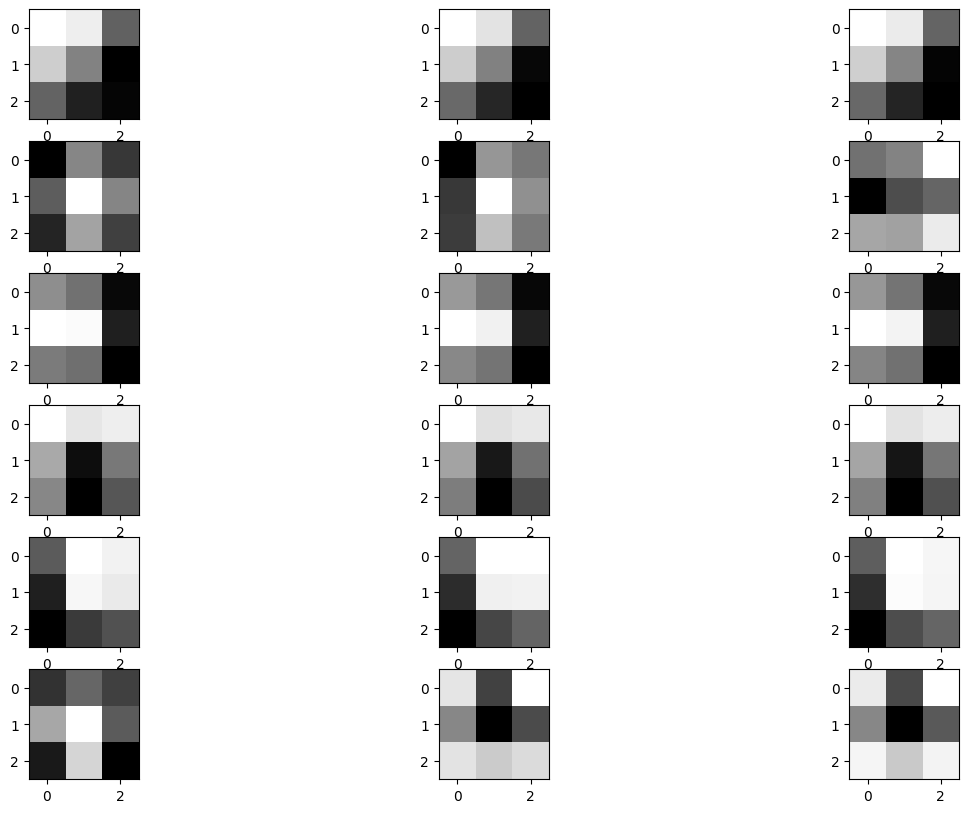

In [11]:
import matplotlib.pyplot as plt
n_filters = 6
ix = 1
fig = plt.figure(figsize=(15, 10))
for i in range(n_filters):
    # get the filters 
    f = filters[:,:,:,i]
    for j in range(3):
        plt.subplot(n_filters, 3, ix)
        plt.imshow(f[:, :, j], cmap='gray')
        ix+=1


plt.show()

In [13]:
from tensorflow.keras.models import Model
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [20]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions 

import numpy as np
# Step 1: Load image and resize it to 224x224 (same size as model input)
img = image.load_img('shoe.jpg', target_size=(224, 224))

# Step 2: Convert image to a NumPy array
img_array = image.img_to_array(img)

# Step 3: Expand dimensions to add batch size (model expects batches, even if it's one image)
img_array = np.expand_dims(img_array, axis=0)

full_img = preprocess_input(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


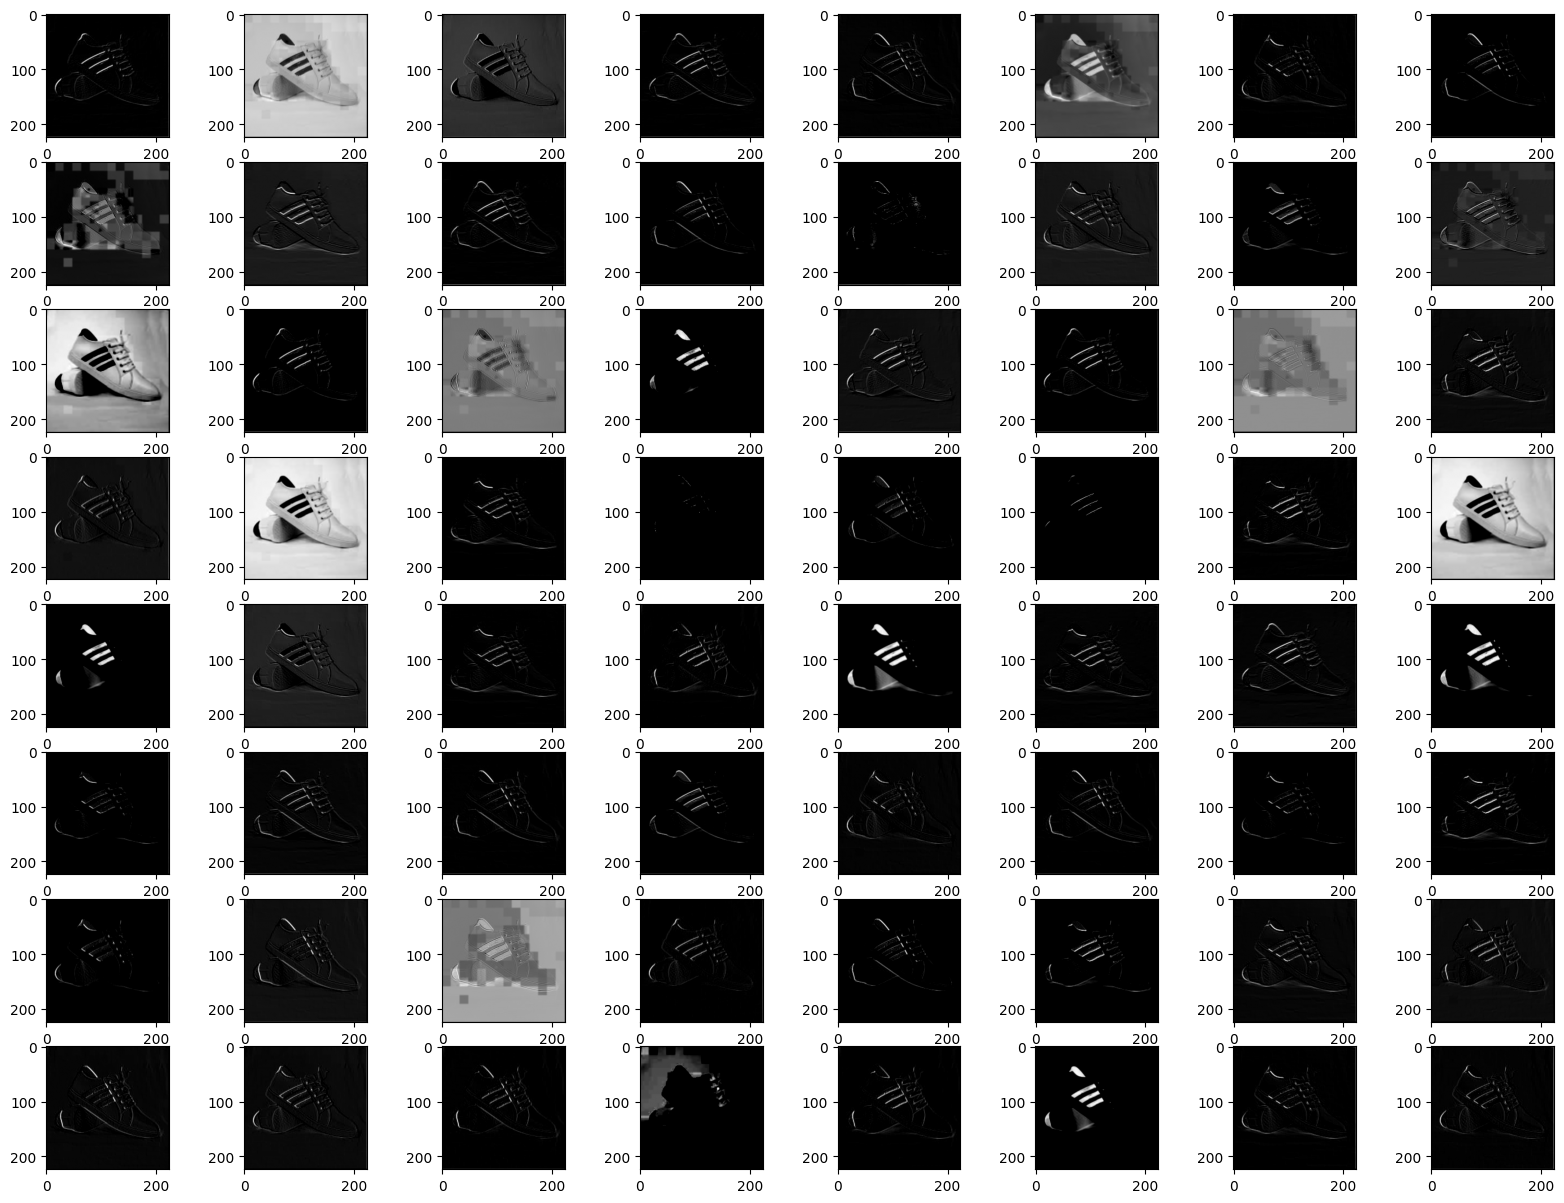

In [24]:
features = model.predict(full_img)

fig = plt.figure(figsize=(20, 15))
for i in range(1, features.shape[3]+1):
    plt.subplot(8, 8, i)
    plt.imshow(features [0, :, :, i-1], cmap='gray')

plt.show()

In [25]:
model2 = VGG16()

In [26]:
layer_index = [2, 5, 9, 13, 17]
outputs = [model2.layers[i].output for i in layer_index]

In [27]:
model3 = Model(inputs=model2.inputs, outputs =outputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


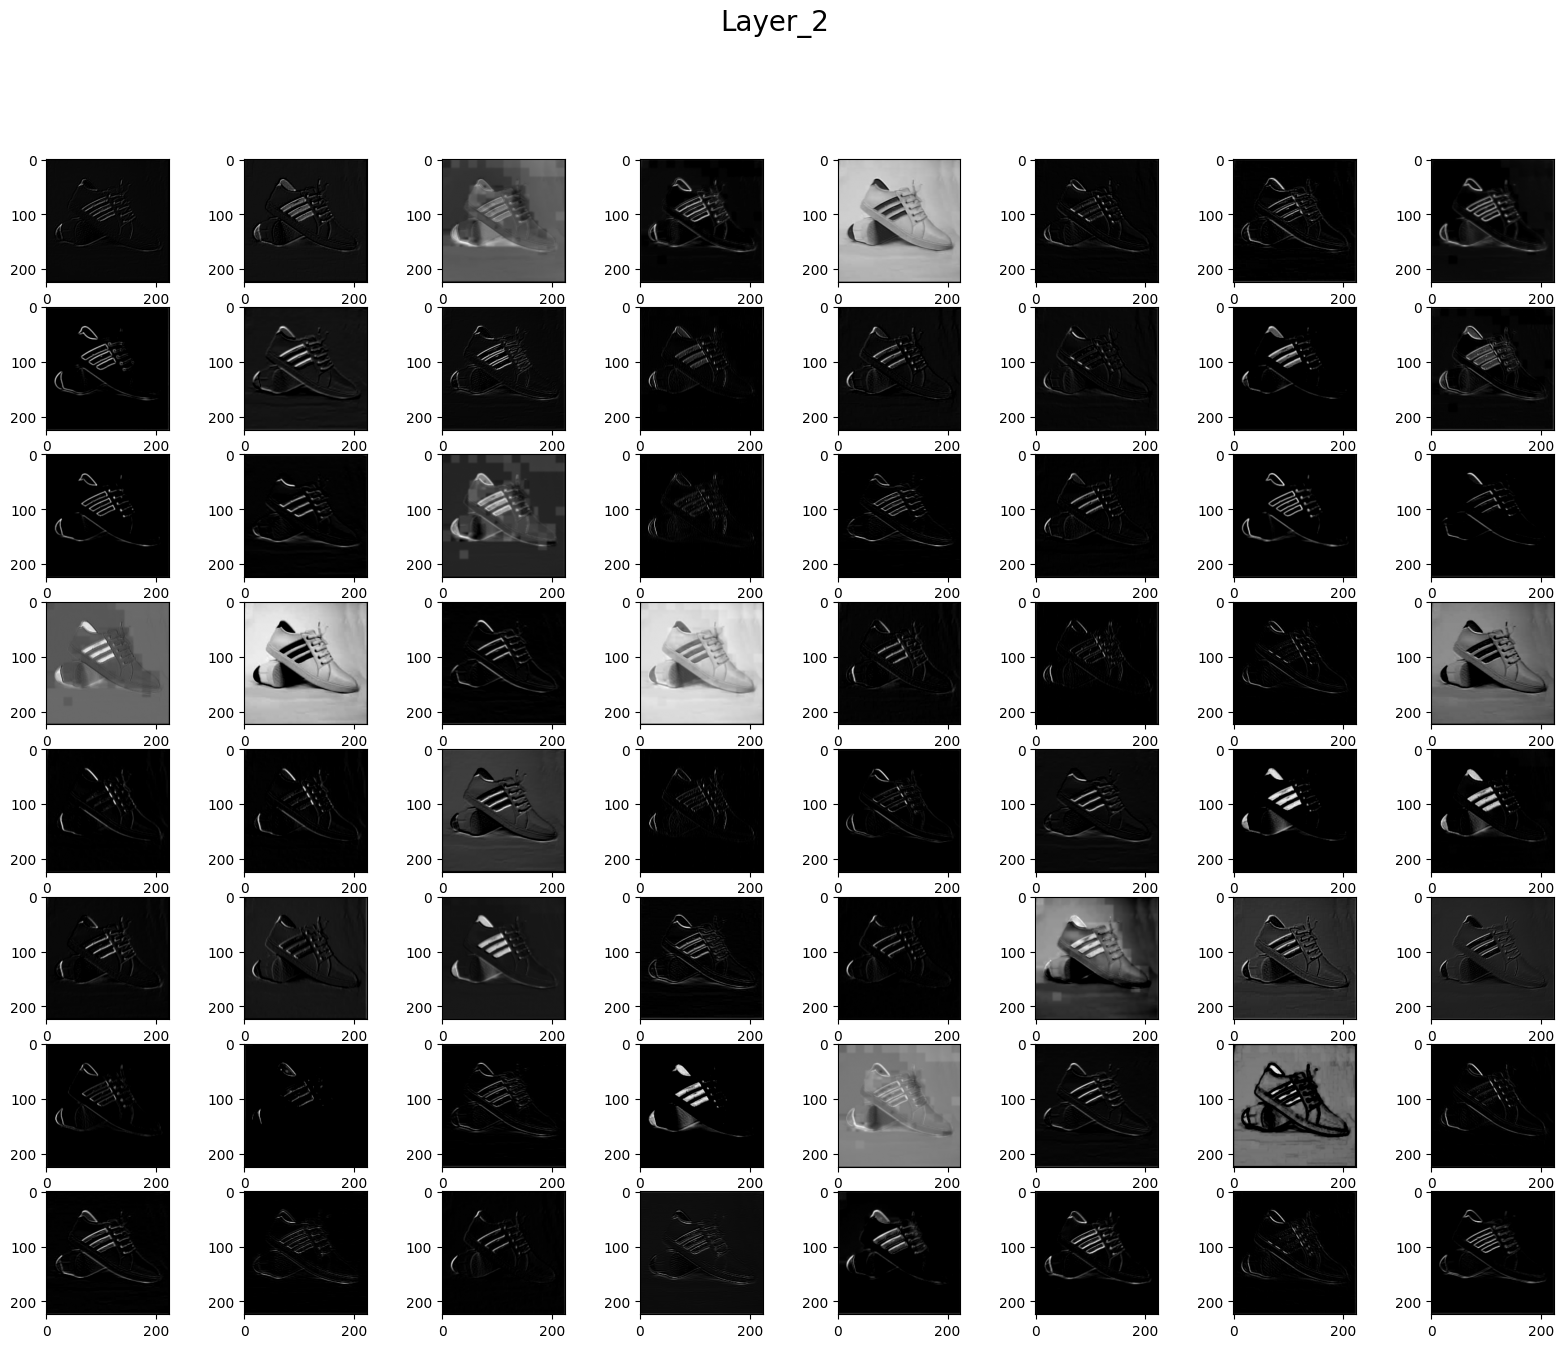

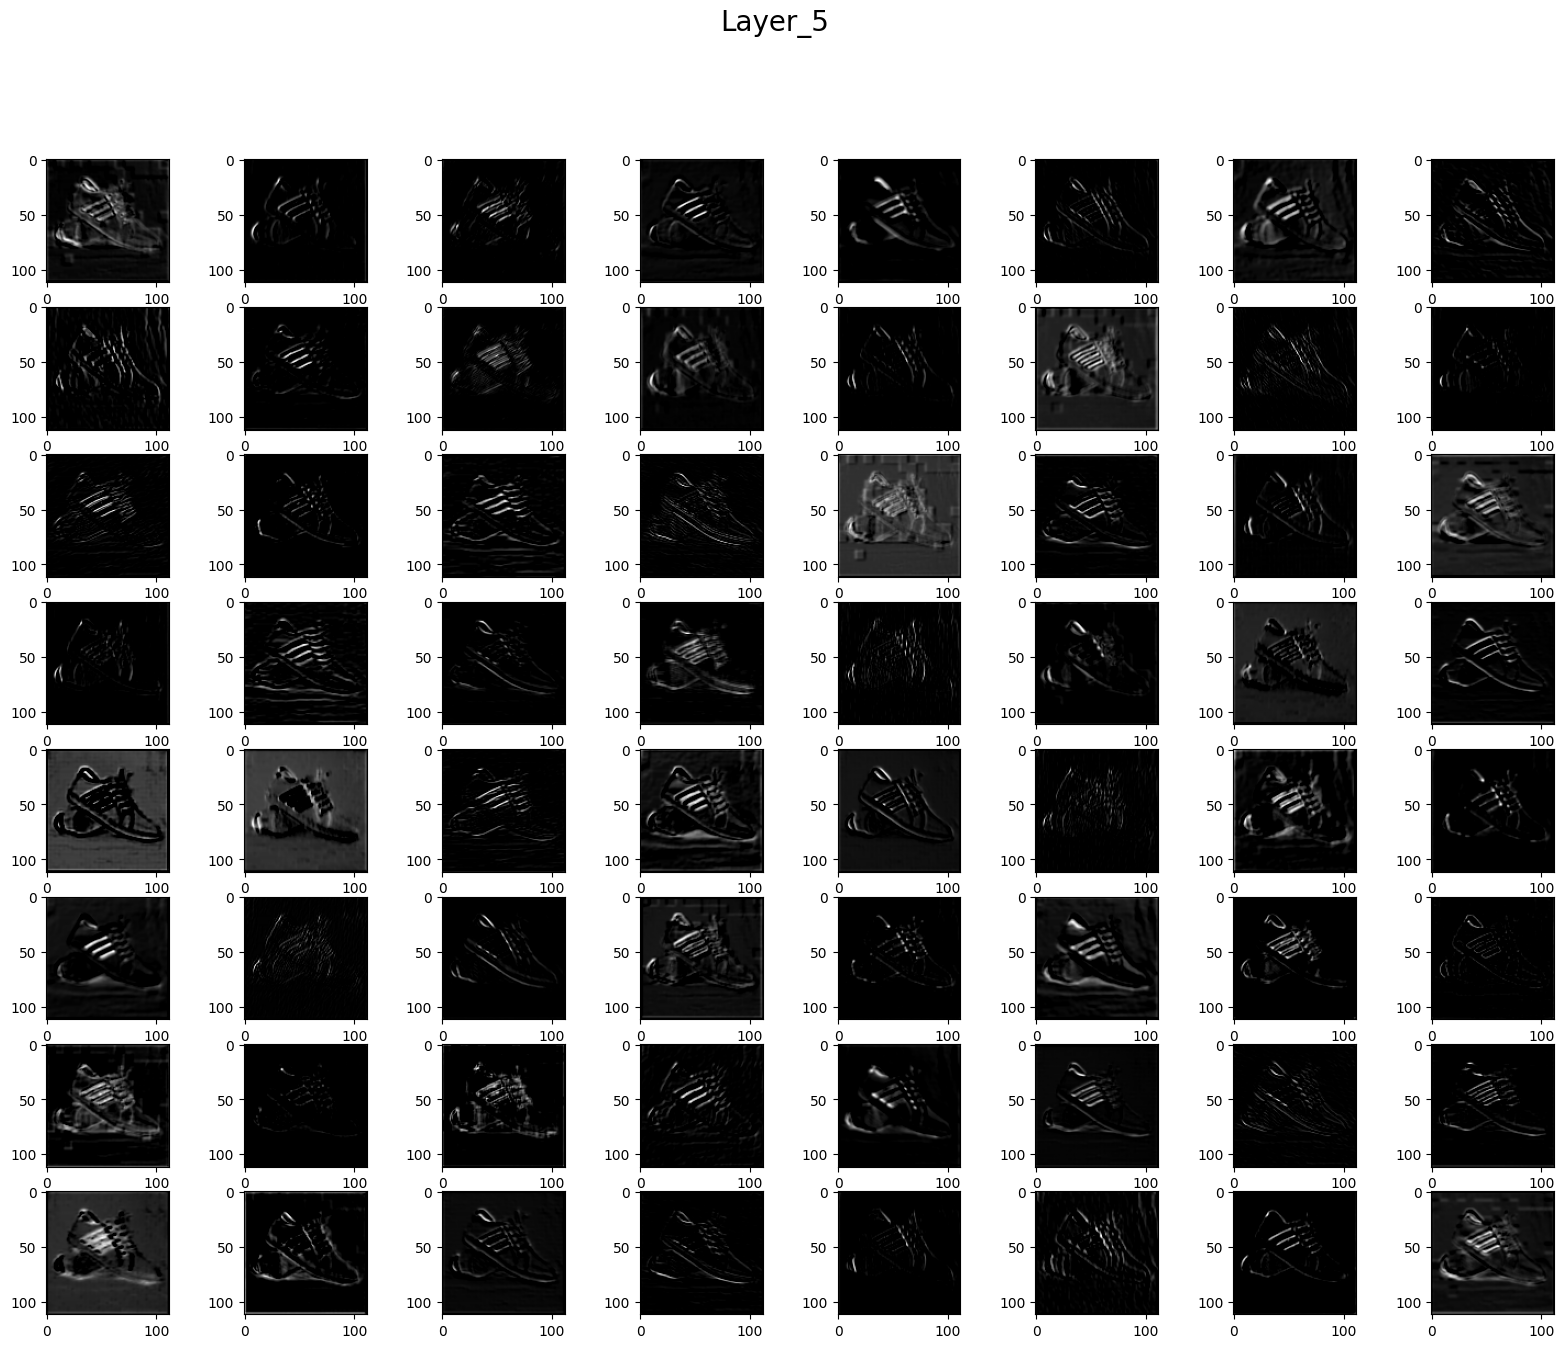

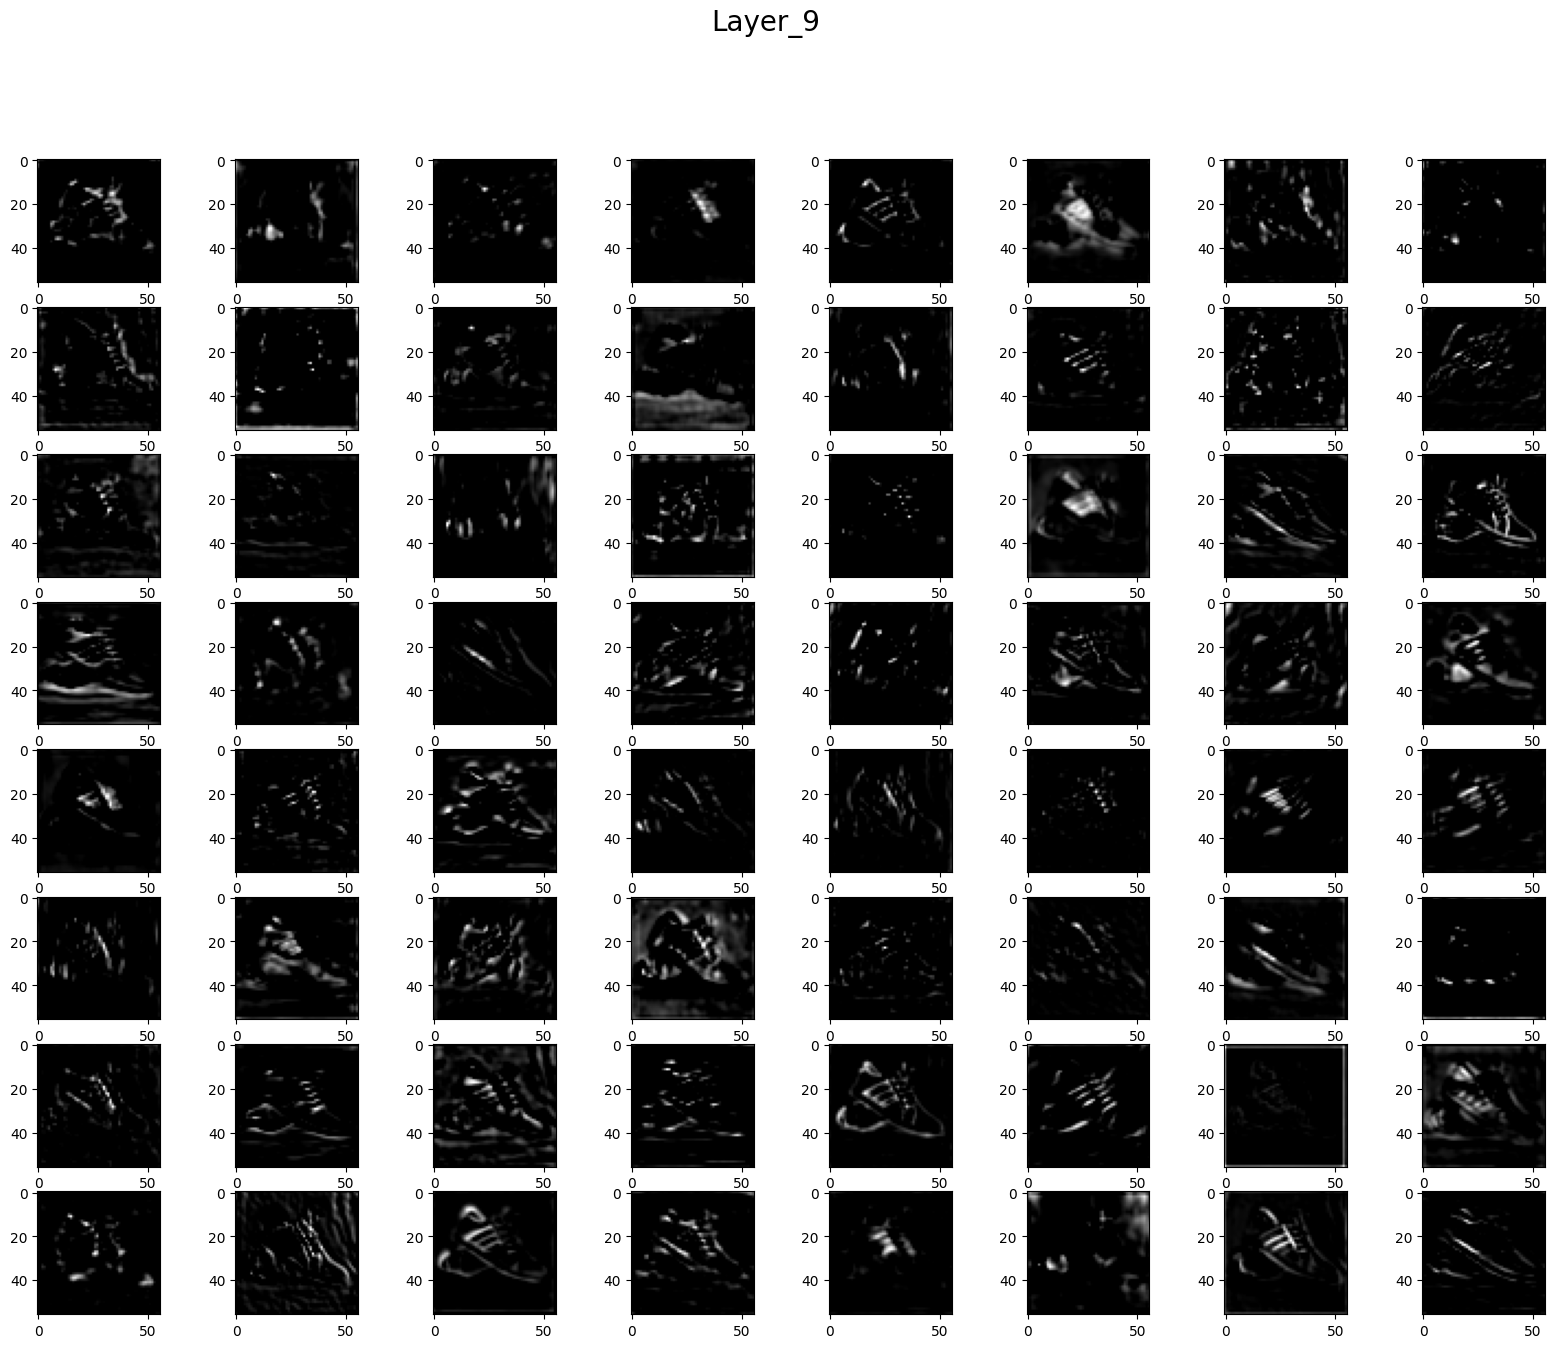

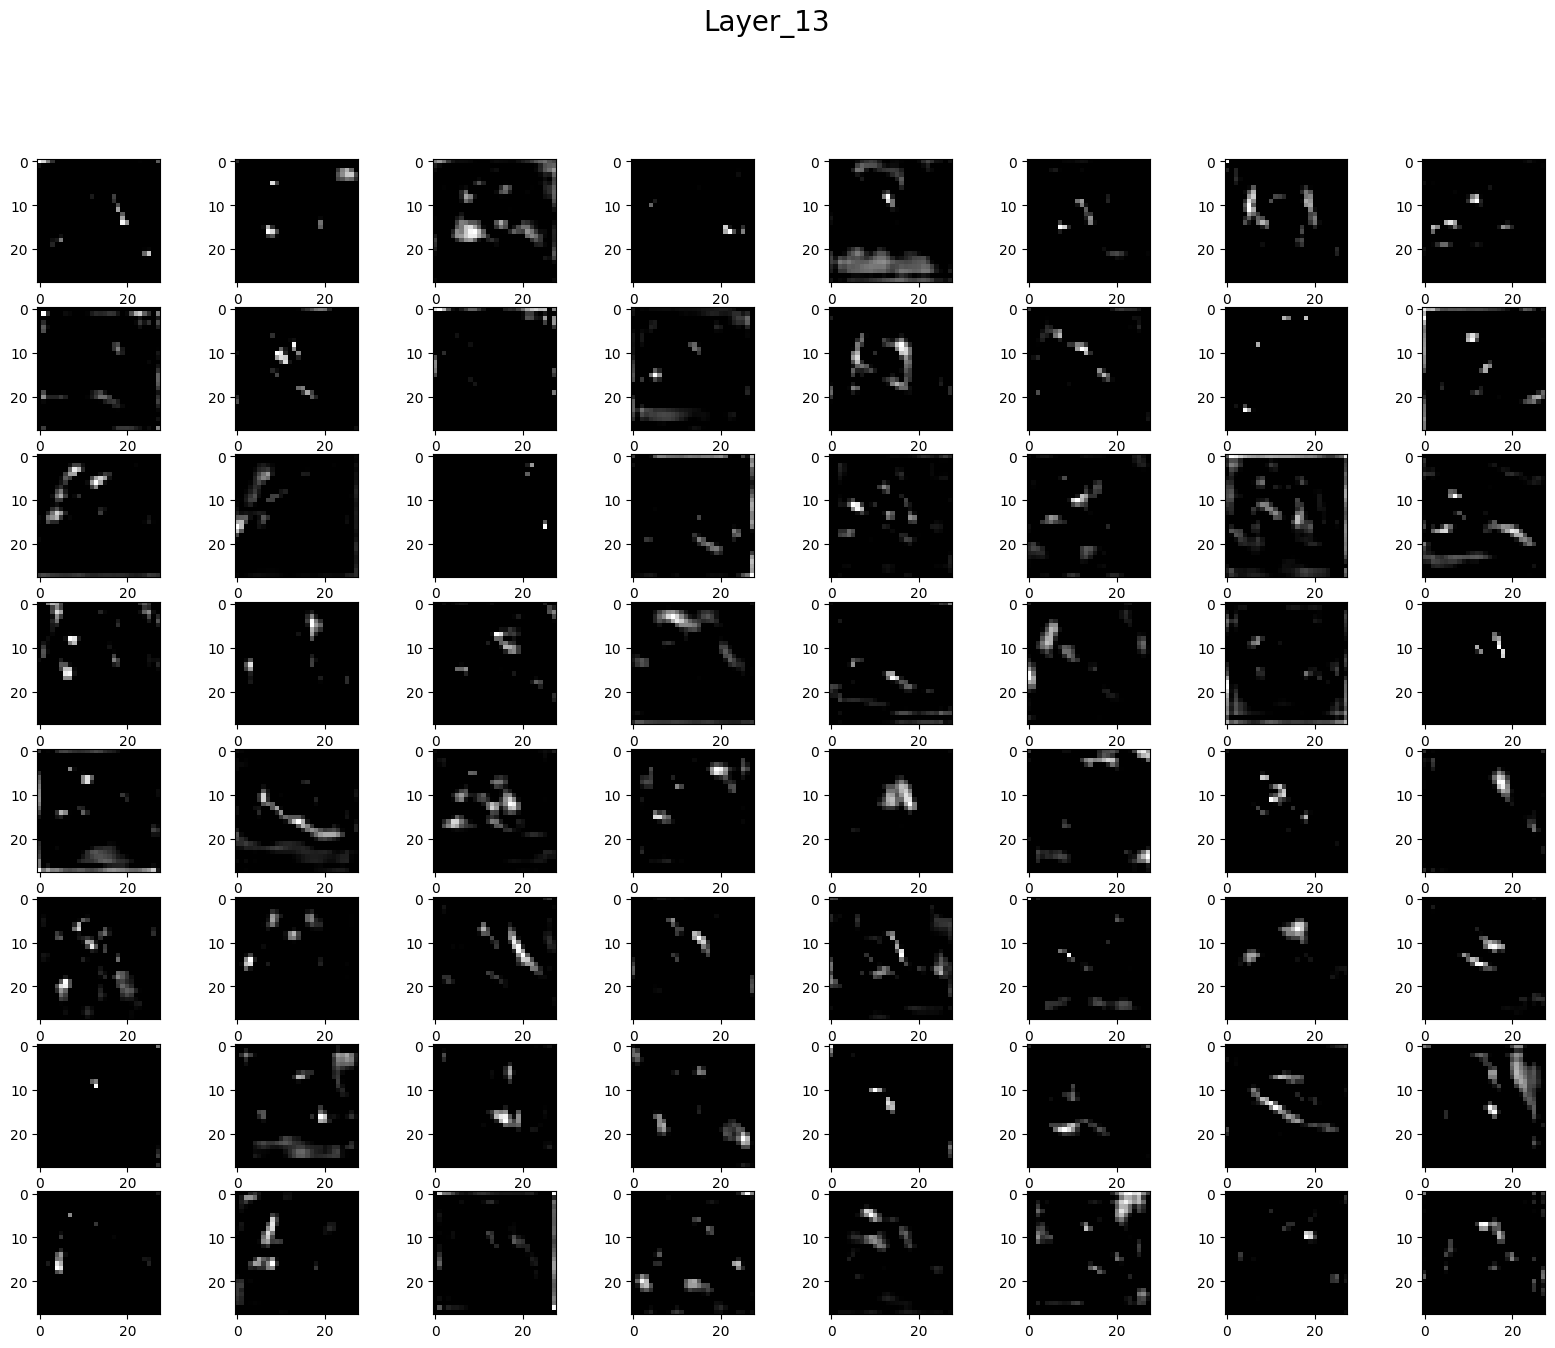

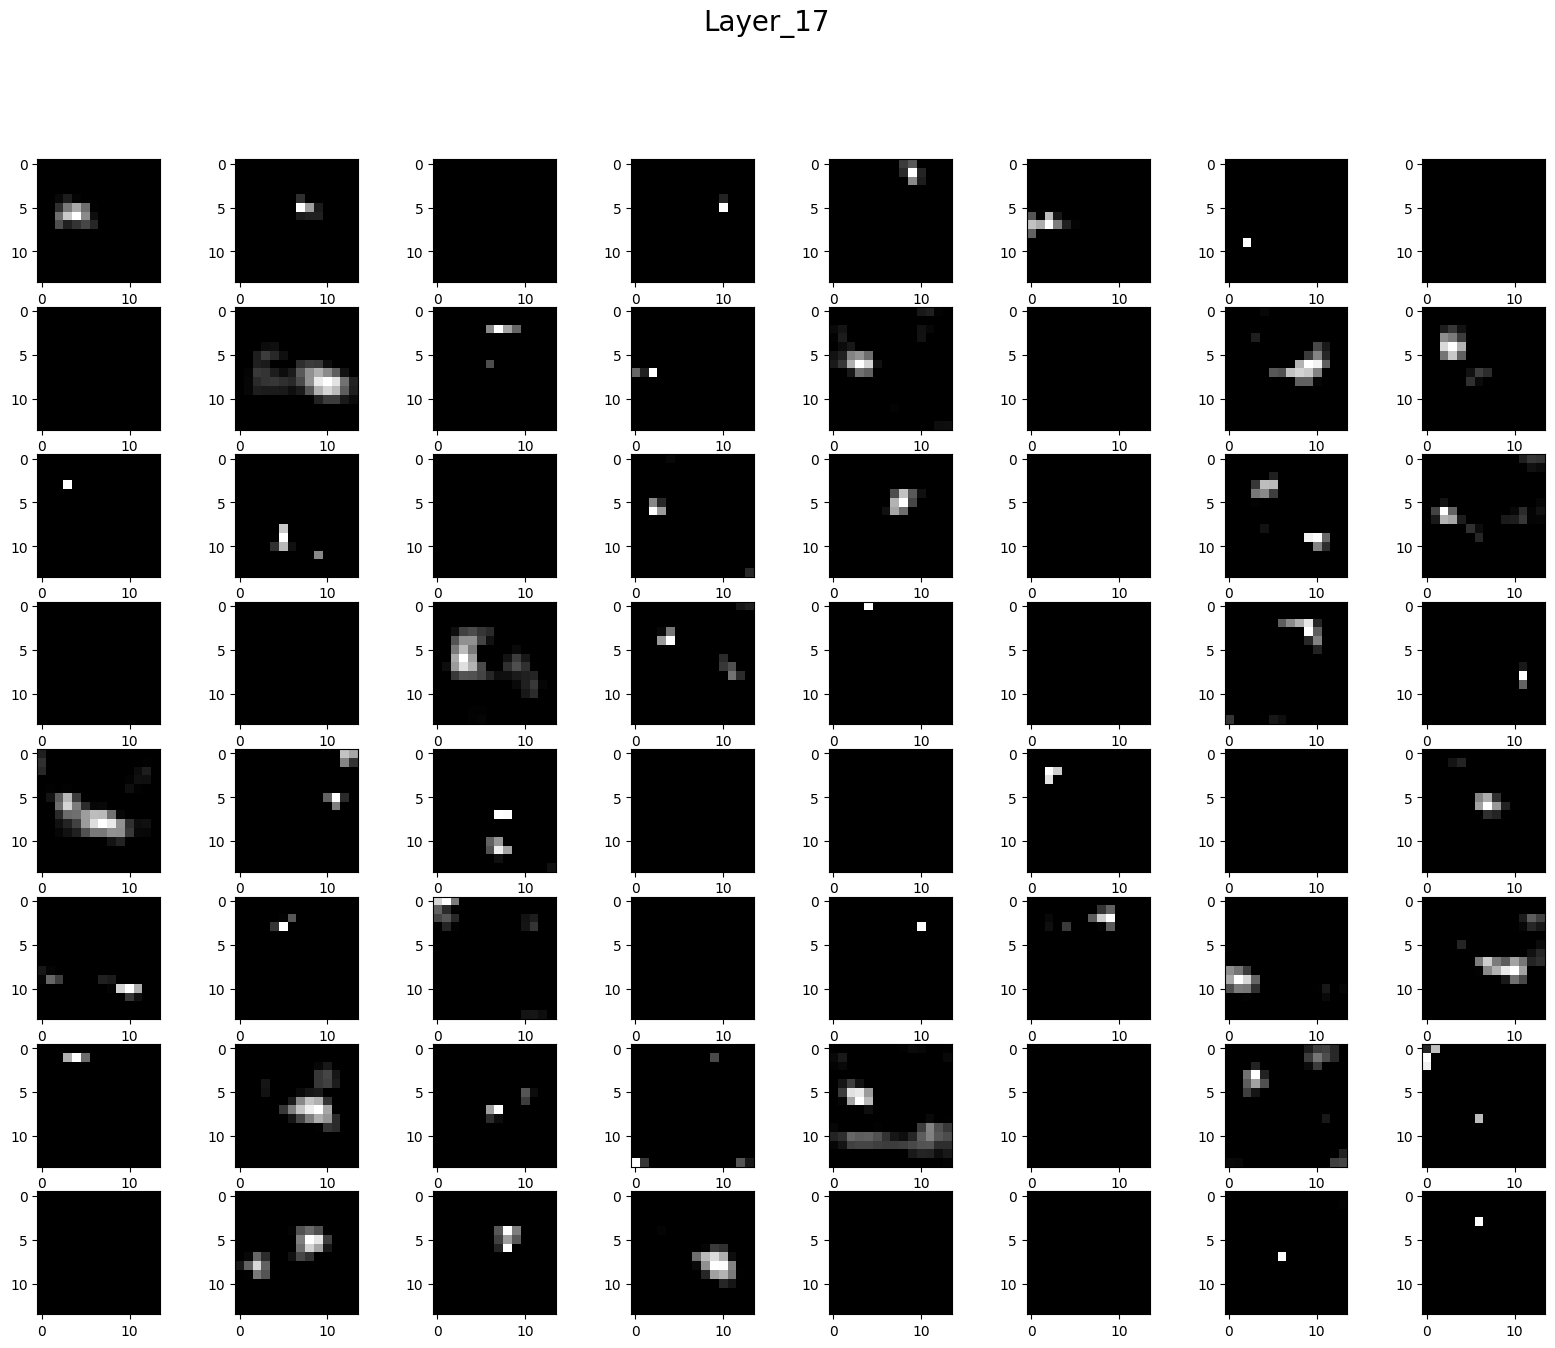

In [29]:
feature_map = model3.predict(full_img)


for i, fmap in zip(layer_index, feature_map):
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle("Layer_{}".format(i), fontsize=20)
    for i in range(1, features.shape[3]+1):
        plt.subplot(8, 8, i)
        plt.imshow(fmap[0, :, :, i-1], cmap='gray')

plt.show()